In [2]:
import pandas as pd 

In [3]:
archivo_combinado = '../CSV/df_web_data_combinado.csv'
archivo_experimental = '../CSV/df_final_experiment_clients.csv'
archivo_demo = '../CSV/df_final_demo.csv'

df_final_web_data_combinado = pd.read_csv(archivo_combinado)
df_experiment_clients = pd.read_csv(archivo_experimental)
df_demo = pd.read_csv(archivo_demo)

df_final_web_data_combinado.head(), df_experiment_clients.head(), df_demo.head() 

(   client_id            visitor_id                      visit_id process_step  \
 0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 
              date_time  
 0  2017-04-17 15:27:07  
 1  2017-04-17 15:26:51  
 2  2017-04-17 15:19:22  
 3  2017-04-17 15:19:13  
 4  2017-04-17 15:18:04  ,
    client_id Variation
 0    9988021      Test
 1    8320017      Test
 2    4033851   Control
 3    1982004      Test
 4    9294070   Control,
    client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 0     836976             6.0              73.0      60.5     U        2.0   
 1    2304905             7.0              94.0 

In [4]:
# Asegurarte de que las columnas necesarias están en el DataFrame
columns = ['num_accts', 'bal', 'clnt_tenure_yr', 'clnt_tenure_mnth']
df_demo_filtered = df_demo[columns].copy()

# Crear una nueva columna para la duración total en meses
df_demo_filtered['total_tenure_months'] = df_demo_filtered['clnt_tenure_yr'] * 12 + df_demo_filtered['clnt_tenure_mnth']

# Verifica los tipos de datos
print(df_demo_filtered.info())

# Limpieza adicional si es necesario (por ejemplo, eliminar valores nulos)
df_demo_filtered = df_demo_filtered.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_accts            70595 non-null  float64
 1   bal                  70595 non-null  float64
 2   clnt_tenure_yr       70595 non-null  float64
 3   clnt_tenure_mnth     70595 non-null  float64
 4   total_tenure_months  70595 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB
None


In [5]:
# Cálculo de la matriz de correlación
correlation_matrix = df_demo_filtered[['num_accts', 'bal', 'total_tenure_months']].corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.268747             0.152220
bal                   0.268747  1.000000             0.203307
total_tenure_months   0.152220  0.203307             1.000000


#Valores cercanos a 1 indican una correlación positiva fuerte.
#Valores cercanos a -1 indican una correlación negativa fuerte.
#Valores cercanos a 0 indican que no hay correlación.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

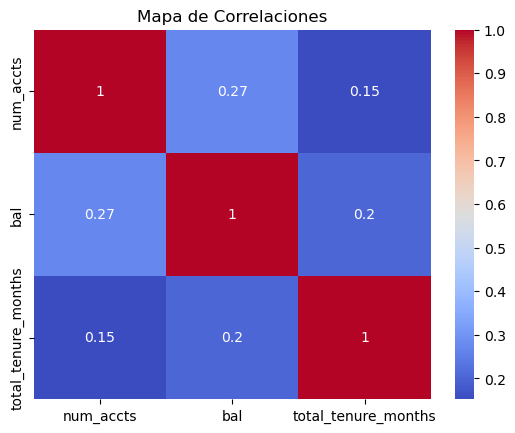

In [ ]:
# Visualización con heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Correlaciones")
plt.show()

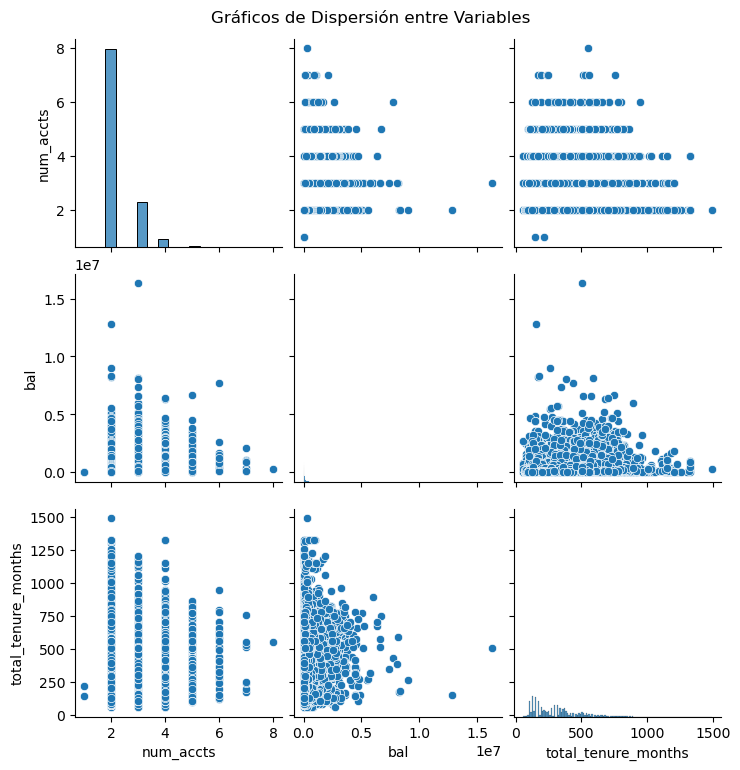

In [8]:
# Gráficos de dispersión
sns.pairplot(df_demo_filtered[['num_accts', 'bal', 'total_tenure_months']])
plt.suptitle("Gráficos de Dispersión entre Variables", y=1.02)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [10]:
# Variables dependiente e independiente
X = df_demo_filtered[['total_tenure_months']].values
y = df_demo_filtered['bal'].values

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Resultados
print(f"Coeficiente de regresión: {model.coef_[0]}")
print(f"Intercepción: {model.intercept_}")

Coeficiente de regresión: 372.61880037535286
Intercepción: 37412.859207820205


In [11]:
# Realizar la combinación de los DataFrames utilizando 'client_id'
df_demo_expanded = df_demo.merge(
    df_experiment_clients[['client_id', 'Variation']],  # Seleccionamos solo 'client_id' y 'Variation'
    on='client_id',  # La clave para la combinación
    how='left'  # Hacemos un 'left join' para conservar todos los registros de df_demo
)

# Verifica la combinación
print(df_demo_expanded.head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth Variation  
0   45105.30           6.0            9.0      Test  
1  110860.30           6.0            9.0   Control  
2   52467.79           6.0            9.0      Test  
3   67454.65           3.0            6.0      Test  
4  103671.75           0.0            3.0   Control  


In [17]:
df_demo_expanded.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [18]:
# Limpiar el dataframe eliminando filas con valores nulos en las columnas relevantes
df_demo_expanded = df_demo_expanded.dropna(subset=['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'bal'])

# Asegurémonos de que los valores de Variation sean consistentes (sin espacios ni mayúsculas)
df_demo_expanded['Variation'] = df_demo_expanded['Variation'].str.strip().str.lower()

# Crear la columna 'total_tenure_months' que será la suma de años y meses convertidos a meses
df_demo_expanded['total_tenure_months'] = df_demo_expanded['clnt_tenure_yr'] * 12 + df_demo_expanded['clnt_tenure_mnth']

# Separar los datos por grupo de prueba y control
control_data = df_demo_expanded[df_demo_expanded['Variation'] == 'control']
test_data = df_demo_expanded[df_demo_expanded['Variation'] == 'test']

# Verificar cuántos registros tiene cada grupo
print(f'Número de registros en el grupo de control: {len(control_data)}')
print(f'Número de registros en el grupo de test: {len(test_data)}')

# Calcular la correlación para el grupo de control
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Calcular la correlación para el grupo de test
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Mostrar los resultados
print("Correlaciones en el grupo de control:")
print(control_corr)

print("\nCorrelaciones en el grupo de test:")
print(test_corr)


Número de registros en el grupo de control: 23527
Número de registros en el grupo de test: 26961
Correlaciones en el grupo de control:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.276809             0.148631
bal                   0.276809  1.000000             0.213581
total_tenure_months   0.148631  0.213581             1.000000

Correlaciones en el grupo de test:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.256786             0.148149
bal                   0.256786  1.000000             0.196635
total_tenure_months   0.148149  0.196635             1.000000
